In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import det

In [70]:
%config InlineBackend.figure_format = "retina"

In [71]:
plt.style.use("seaborn")


# Chapter 1: Introduction

## Bayesian Probabilities
Consider a probability distribution driven by a set of parameters $w$ and observed data $D$. Depending on the point of view about $w$  we might consider knowing the *true* value of $w$ considering $D$ in the following two ways:

* **frequentist POV**: $w$ is unique but unknown, we can estimate how close we are to $w$ via $D$
* **bayesian POV**: $D$ is unique (the one observed); $w$ is a random variable (might change, we will see its effect once in $D$)

	In both the frequentist POV and the bayesian POV we make use of MLE $\mathbb{P}(D|w)$ . In ML, the negative log-likelyhood is known as the **error function**

$$
	p(w | D) = \frac{p(D|w)p(w)}{p(D)}
$$

Where,
* $p(w|D)$ is the uncertainty in $w$ after having observed $D$
* $p(w)$ is the prior probability distribution; where we capture our prior  beliefs
* $p(D|w)$ is the likelyhood function. It expresses how probable is the observed data for different values of $w$

### The Gaussian Distribution
The gaussian distribution is defined in the following way:
$$
    \mathcal{N}(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}
$$

An alternative way to represent a gaussian distribution is by considering a *precision* term denoted by $\beta := 1 / \sigma^2$
$$
    \mathcal{N}(x | \mu, \beta^{-1}) = \frac{\beta^{1/2}}{\sqrt{2\pi\sigma^2}}e^{-\frac{\beta}{2}(x - \mu)^2}
$$

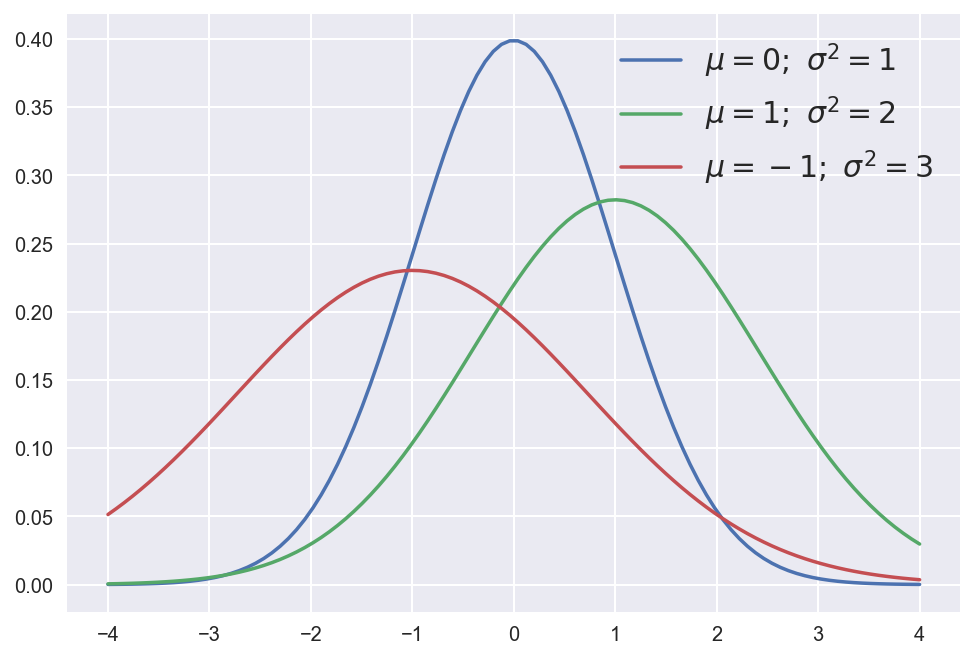

In [72]:
def norm_pdf(x, mu, sigma2): return 1 / np.sqrt(2 * np.pi * sigma2) * np.exp(-(x - mu)**2 / (2 * sigma2))
xrange = np.linspace(-4, 4, 100)
plt.plot(xrange, norm_pdf(xrange, 0, 1), label=r"$\mu=0; \ \sigma^2=1$")
plt.plot(xrange, norm_pdf(xrange, 1, 2), label=r"$\mu=1; \ \sigma^2=2$")
plt.plot(xrange, norm_pdf(xrange, -1, 3), label=r"$\mu=-1; \ \sigma^2=3$")
plt.legend(fontsize=15)

The gaussian distribution defined over a $D$ dimensional vector $X$ is

$$
    \mathcal{N}(X | \mu, \Sigma) = \frac{1}{(2\pi)^{D/2}\det(\Sigma)^{1/2}}\exp\left(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)\right)
$$


In [73]:
from numpy.linalg import inv

In [119]:
Xrange = np.mgrid[-3:3:0.1, -3:3:0.1]

In [162]:
Sigma = np.array([[0.1, -0.8]]).T
Sigma = np.exp(Sigma @ Sigma.T)

def norm_pdf_v(X, mu, sigma):
    diff_term = (X - mu[:, None])
    D = len(X)
    den = (2 * np.pi) ** (D / 2) * np.sqrt(det(sigma))
    num = np.einsum("inm,ij,jnm->nm", diff_term, inv(sigma), diff_term)
    num = np.exp(-num / 2)
    return num / den

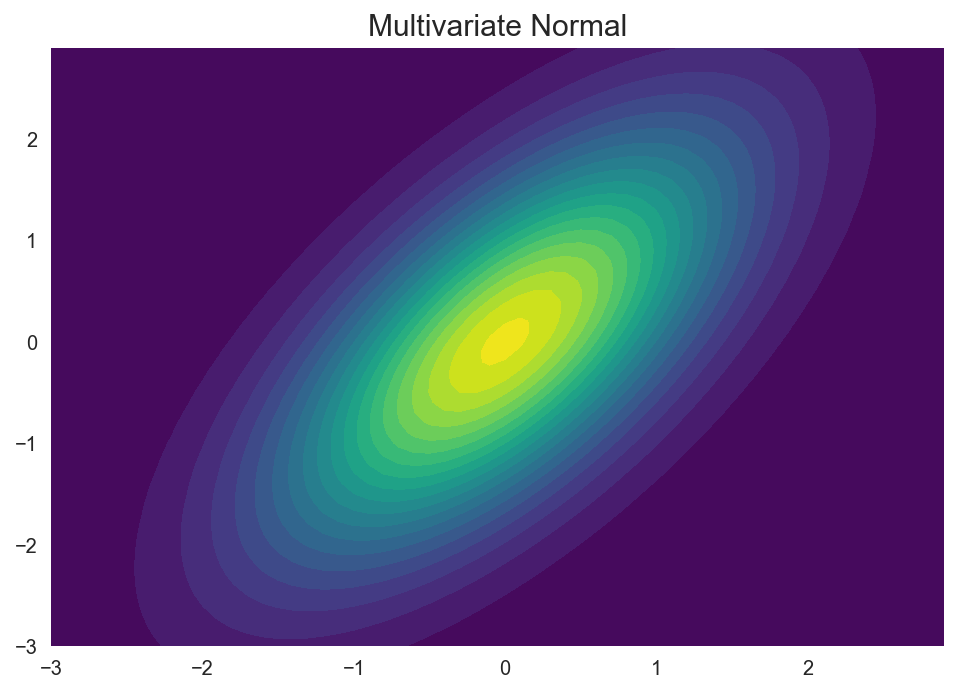

In [165]:
plt.title("Multivariate Normal", fontsize=15)
plt.contourf(*Xrange, norm_pdf_v(Xrange, mu0, Sigma), cmap="viridis", levels=20);